In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
import seaborn as sns
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from openpyxl import load_workbook
import seaborn as sns

In [2]:
D1510=pd.read_csv('China statistic 2015-2019\E1510.csv')

In [3]:
D1510

Commodity Category  \
0                                             Total   
1                                Grain and OiL Food   
2                                     Grain and Oil   
3                           Meat. Poultry7 and Eggs   
4                                  Aquatic Products   
5                                        Vegetables   
6                 Dried and Fresh Melons and Fruits   
7                                         Beverages   
8                                Tobacco and Liquor   
9                Clothing. Shoes. Hats and Textiles   
10                                         Clothing   
11                                Footwear and Hats   
12                            Knitwear and Textiles   
13                                        Cosmetics   
14                      Gold. Silver and Jewellery7   
15                           Articles for Daily Use   
16                  Hardware & Electrical Materials   
17                   Sports & Recreational Articles   
18                           Photographic Equipment   
19                         Newspapers and Magazines   
20                        E-book and Video Products   
21  Household Appliances and Audio-visual Equipment   
22         Traditional Chinese and Western Medicine   
23                                 Western Medicine   
24                     Traditional Chinese Medicine   
25                        Cultural and Office Goods   
26                   Computer and Related Equipment   
27                                        Furniture   
28                         Communication Appliances   
29                        Coal and Related Products   
30                         Wood and Wooden Products   
31                   Petroleum and Related Products   
32      Raw Chemical Materials and Related Products   
33                                       Fertilizer   
34                                  Metal Materials   
35                Building and Decoration Materials   
36                 Mechanical & Electrical Products   
37                          Agricultural Machinery7   
38                                       Automobile   
39                               Seed and Feedstuff   
40                                  Cotton and Hemp   
41                                           Others   

    Number of\nBooths\n(unit) Turnover\n(100 million\nyuan)  Wholesale  \
0                     3045931                      112016.8    98733.4   
1                      882099                       33735.7    30663.7   
2                       78528                        4316.3     4033.2   
3                      117747                        4568.2     3657.1   
4                      126661                        6660.7     5944.3   
5                      326150                        7816.6     7200.2   
6                      161232                        8549.5     8293.3   
7                       43016                        1065.3      963.3   
8                       30902                         984.5      873.7   
9                      812537                         18452    17040.5   
10                     503654                        7527.7     6534.0   
11                     108317                        1614.3     1379.7   
12                     200566                        9309 9     9126.7   
13                      20834                           262      199.3   
14                      33707                          1145     1031.7   
15                     149744                        3132.6     2811.2   
16                     109094                        2401.7     2175.8   
17                      10078                           157      135.0   
18                        944                           9.6        3.6   
19                       2738                         114.5       97.4   
20                       2872                          45.9       30.7   
21                      32307          

In [4]:
MM=D1510.loc(axis=0)[1,7,8,9,13,14,15,16,17,19,20,21,22,25,27,28,29,30,31,32,34,35,36,38,39,40,41]

In [5]:
del MM['Commodity Category']

array([<AxesSubplot:>], dtype=object)

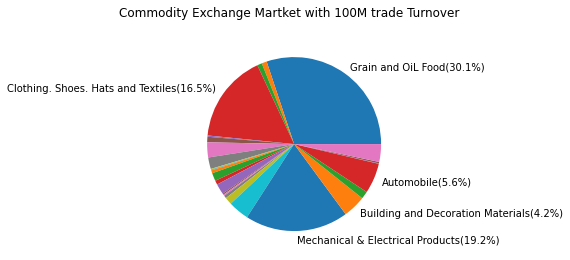

In [6]:
name = ['Grain and OiL Food(30.1%)',' ',' ','Clothing. Shoes. Hats and Textiles(16.5%)',
       ' ',' ','  ',' ',
       ' ',' ',' ',' ',
       ' ',' ',' ',' ',' ',
       ' ',' ',' ',
       'Mechanical & Electrical Products(19.2%)','Building and Decoration Materials(4.2%)',' ','Automobile(5.6%)',' ',
       ' ',' ']
MM=MM.astype('float')
MM['Turnover\n(100 million\nyuan)'].plot(kind='pie',subplots=True
                                      ,labels=name,title='Commodity Exchange Martket with 100M trade Turnover',legend=False,ylabel='',explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))


array([<AxesSubplot:>], dtype=object)

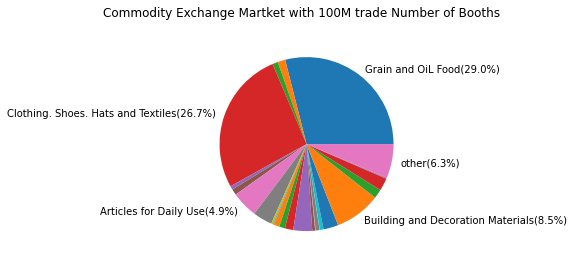

In [7]:
name = ['Grain and OiL Food(29.0%)',' ',' ','Clothing. Shoes. Hats and Textiles(26.7%)',
       ' ','','Articles for Daily Use(4.9%)','',
       ' ',' ',' ',' ',
       ' ',' ',' ',' ',' ',
       ' ',' ',' ',
       ' ','Building and Decoration Materials(8.5%)',' ',' ',' ',
       ' ','other(6.3%)']
MM=MM.astype('float')
MM['Number of\nBooths\n(unit)'].plot(kind='pie',subplots=True
                                      ,labels=name,title='Commodity Exchange Martket with 100M trade Number of Booths',legend=False,ylabel='',explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))


In [12]:
#Define the average profit of per Booths in MM
MMdata=MM
MMdata=MMdata.astype('float')
mmPBP=[]
for i in MMdata.index.values:
    mmPBP.insert(i,MMdata.loc[i,'Turnover\n(100 million\nyuan)']/MMdata.loc[i,'Number of\nBooths\n(unit)'])


In [8]:
MM

Number of\nBooths\n(unit)  Turnover\n(100 million\nyuan)  Wholesale  \
1                    882099.0                        33735.7    30663.7   
7                     43016.0                         1065.3      963.3   
8                     30902.0                          984.5      873.7   
9                    812537.0                        18452.0    17040.5   
13                    20834.0                          262.0      199.3   
14                    33707.0                         1145.0     1031.7   
15                   149744.0                         3132.6     2811.2   
16                   109094.0                         2401.7     2175.8   
17                    10078.0                          157.0      135.0   
19                     2738.0                          114.5       97.4   
20                     2872.0                           45.9       30.7   
21                    32307.0                          615.4      503.4   
22                    32435.0                         1662.6     1570.4   
25                    47433.0                          855.5      630.1   
27                   106759.0                         2187.7     1279.6   
28                    16373.0                          275.8      207.9   
29                     3053.0                          270.5      269.3   
30                    21677.0                          593.0      538.8   
31                     1223.0                         1513.0     1512.1   
32                    21120.0                         4346.6     4338.1   
34                    84519.0                        21497.2    21439.7   
35                   260140.0                         4731.3     3465.6   
36                    51212.0                         1570.0     1539.5   
38                    71210.0                         6316.9     1636.5   
39                     4542.0                           85.6       80.2   
40                     2678.0                          310.5      307.9   
41                   191629.0                         3689.1     3391.9   

    Retail  
1   3072.1  
7    102.0  
8    110.8  
9   1411.5  
13    62.7  
14   113.2  
15   321.4  
16   225.9  
17    21.9  
19    17.1  
20    15.2  
21   112.0  
22    92.3  
25   225.5  
27   908.0  
28    67.9  
29     1.1  
30    54.2  
31     0.9  
32     8.5  
34    57.5  
35  1265.7  
36    30.5  
38  4680.4  
39     5.4  
40     2.6  
41   297.1

In [19]:
mmPBPtable={'Index':[1,7,8,9,13,14,15,16,17,19,20,21,22,25,27,28,29,30,31,32,34,35,36,38,39,40,41],
           'PBP':mmPBP}
df = pd.DataFrame(mmPBPtable) 

In [25]:
df=df.sort_values('PBP', ascending=False)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

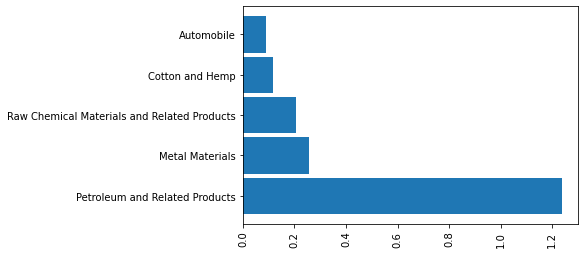

In [36]:
mmPBPtop5=df['PBP'].head(5)
yAxis=[10,20,30,40,50]

labels=['Petroleum and Related Products','Metal Materials','Raw Chemical Materials and Related Products','Cotton and Hemp','Automobile']
plt.barh(yAxis,df['PBP'].head(5).astype('float'),tick_label=labels,height=9)
plt.xticks(rotation=90)

In [39]:
#find the heightest wholesale and retail rate in MM
WRdata=MM
WRdata=WRdata.astype('float')
WRrate=[]
for i in WRdata.index.values:
    WRrate.insert(i,WRdata.loc[i,'Turnover\n(100 million\nyuan)']/WRdata.loc[i,'Number of\nBooths\n(unit)'])


In [41]:
mmWRtable={'Index':[1,7,8,9,13,14,15,16,17,19,20,21,22,25,27,28,29,30,31,32,34,35,36,38,39,40,41],
           'WRrate':WRrate}
WRdf = pd.DataFrame(mmWRtable) 

In [43]:
WRdf=WRdf.sort_values('WRrate', ascending=False)

In [ ]:
### Find which market is wholesale and which market is retail
### Using KNN or K means 2D is wholesale and retail